# Remember, sequences are reversed!

In [34]:
%matplotlib inline
import torch
import numpy as np
import tensorflow as tf
from abc import ABC, abstractmethod
from scripts.stlcg import *
from scripts.stlviz import make_stl_graph
from scripts.util import *

import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [35]:
x_np = np.array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4], dtype=np.float32).reshape([1, 10, 1])
w_np = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1], dtype=np.float32).reshape([1, 10, 1])
x = torch.tensor(x_np, requires_grad=False)
w = torch.tensor(w_np, requires_grad=False)
c = torch.tensor(4.0, dtype=torch.float, requires_grad=True)
d = torch.tensor(1.0, dtype=torch.float, requires_grad=True)

In [36]:
GThan = GreaterThan(name="x", c=c)
print(GThan)
LThan = LessThan(name="w", c=d)
print(LThan)
Eq = Equal(name="x", c=d)
print(Eq)
An = And(subformula1=LThan, subformula2=GThan)
print(Eq)
Alw = Always(subformula=An)
print(Alw)
Ev = Eventually(subformula=An)
print(Ev)

x >= 4.0
w <= 1.0
x = 1.0
x = 1.0
◻ [0, inf]( (w <= 1.0) ∧ (x >= 4.0) )
♢ [0, inf]( (w <= 1.0) ∧ (x >= 4.0) )


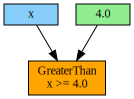

In [73]:
make_stl_graph(GThan)

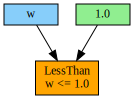

In [74]:
make_stl_graph(LThan)

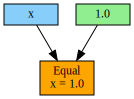

In [75]:
make_stl_graph(Eq)

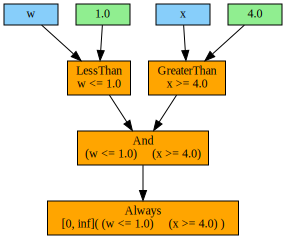

In [78]:
make_stl_graph(Alw)

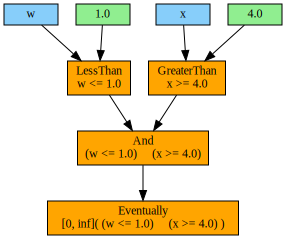

In [79]:
make_stl_graph(Ev)

# Testing grad functionality

In [23]:
device = torch.device("cpu")
learning_rate = 0.1
x = torch.tensor(x_np, requires_grad=False)
w = torch.tensor(w_np, requires_grad=False)
c = torch.tensor(2.0, dtype=torch.float, requires_grad=True)
d = torch.tensor(-3.0, dtype=torch.float, requires_grad=True)

subformula1 = LessThan(name="x", c=d)
GThan = GreaterThan(name="w", c=c)
subformula2=Always(subformula=GThan, interval=[2,4])

model = Or(subformula1=subformula1, subformula2=subformula2)

optimizer = torch.optim.Adam([c, d], lr=learning_rate)
scale = 10

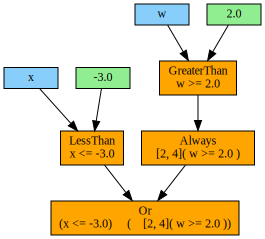

In [53]:
make_stl_graph(model)

In [26]:
model = GThan
for i in range(100):
    loss = (model.robustness(x)**2).mean()
    print("iteration: ", i, " ----  c =", c.detach().numpy(), "  ----  loss =", loss.detach().numpy())
    loss.backward()
    with torch.no_grad():
        c -= learning_rate * c.grad
        c.grad.zero_()

iteration:  0  ----  c = 2.0   ----  loss = 3.61
iteration:  1  ----  c = 1.62   ----  loss = 2.3104
iteration:  2  ----  c = 1.316   ----  loss = 1.4786559
iteration:  3  ----  c = 1.0728   ----  loss = 0.94633985
iteration:  4  ----  c = 0.87824005   ----  loss = 0.6056575
iteration:  5  ----  c = 0.72259206   ----  loss = 0.38762084
iteration:  6  ----  c = 0.59807366   ----  loss = 0.24807738
iteration:  7  ----  c = 0.49845892   ----  loss = 0.15876952
iteration:  8  ----  c = 0.41876712   ----  loss = 0.101612486
iteration:  9  ----  c = 0.3550137   ----  loss = 0.06503199
iteration:  10  ----  c = 0.30401096   ----  loss = 0.041620474
iteration:  11  ----  c = 0.26320878   ----  loss = 0.026637107
iteration:  12  ----  c = 0.23056702   ----  loss = 0.017047746
iteration:  13  ----  c = 0.20445362   ----  loss = 0.010910558
iteration:  14  ----  c = 0.18356289   ----  loss = 0.0069827563
iteration:  15  ----  c = 0.16685031   ----  loss = 0.0044689644
iteration:  16  ----  c = 0.

In [54]:
for i in range(100):
    trace1 = model.subformula1(x)
    trace2 = model.subformula2(model.subformula2.subformula(w), scale=scale)
    loss = (model.robustness(trace1, trace2, scale=scale)**2).mean()
    print("iteration: ", i, " ----  d =", d.detach().numpy(), " ----  c =", c.detach().numpy(), "  ----  loss =", loss.detach().numpy())
    loss.backward()
    with torch.no_grad():
        d -= learning_rate * d.grad
        c -= learning_rate * c.grad
        d.grad.zero_()
        c.grad.zero_()

iteration:  0  ----  d = -3.0  ----  c = 2.0   ----  loss = 1.0000908
iteration:  1  ----  d = -3.0  ----  c = 2.200009   ----  loss = 0.640058
iteration:  2  ----  d = -3.0  ----  c = 2.3600163   ----  loss = 0.40963712
iteration:  3  ----  d = -3.0  ----  c = 2.488022   ----  loss = 0.2621679
iteration:  4  ----  d = -3.0  ----  c = 2.5904267   ----  loss = 0.16778748
iteration:  5  ----  d = -3.0  ----  c = 2.6723504   ----  loss = 0.10738402
iteration:  6  ----  d = -3.0  ----  c = 2.7378893   ----  loss = 0.06872584
iteration:  7  ----  d = -3.0  ----  c = 2.7903204   ----  loss = 0.043984577
iteration:  8  ----  d = -3.0  ----  c = 2.8322654   ----  loss = 0.028150138
iteration:  9  ----  d = -3.0  ----  c = 2.8658214   ----  loss = 0.018016094
iteration:  10  ----  d = -3.0  ----  c = 2.892666   ----  loss = 0.011530315
iteration:  11  ----  d = -3.0  ----  c = 2.914142   ----  loss = 0.007379413
iteration:  12  ----  d = -3.0  ----  c = 2.9313226   ----  loss = 0.004722826
iter

In [129]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(7.0, requires_grad=True)

In [134]:
mask = bump(torch.arange(0, 10, 1, dtype=torch.float32), a, b, 3)
seg = x[:,torch.round(mask).type('torch.ByteTensor'),:]

In [135]:
loss

tensor(9.)

In [136]:
loss = torch.max(seg)**2

In [132]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [27]:
# oper = "min"
def foo(a, b, s, scale, large_num, oper):
    mask = torch.arange(0.5, 10.5, 1.0, dtype=torch.float32)
    # a = torch.tensor(1, requires_grad=True, dtype=torch.float32)
    # b = torch.tensor(6, requires_grad=True, dtype=torch.float32)
    # s = torch.tensor(5, requires_grad=False, dtype=torch.float32)
    mask = bump(mask, a, b, s).reshape([1, 10, 1])
    out = bump_transform(oper, x, mask, scale=scale, large_num=10**large_num)
    idx = torch.argmin(out).numpy().item() if oper == "min" else torch.argmax(out).numpy().item()
    plt.figure(figsize=(15, 6))
    plt.plot([a, a], [-5, 5], 'k--')
    plt.plot([b, b], [-5, 5], 'k--')
    plt.plot(x[0,:,0].numpy(), linewidth=3)
    plt.plot(mask[0,:,0].detach().numpy())
    plt.plot(out[0,:,0].detach().numpy())
    plt.scatter(idx, x[0,idx,0].detach().numpy(), s=100)
    plt.axis([0, 10, -5, 5])

In [28]:
interact(foo, a=(0,10), b=(0,10), s=(1,100, 0.5), scale=(1, 50), large_num=(2, 8), oper=["min", "max"])

interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…

<function __main__.foo(a, b, s, scale, large_num, oper)>

In [1]:
%matplotlib inline
import torch
import numpy as np
import tensorflow as tf
from abc import ABC, abstractmethod
from scripts.stlcg import *
from scripts.stlviz import make_stl_graph
from scripts.util import *

import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython

c = torch.tensor(1, requires_grad=True, dtype=torch.float32)
GThan = GreaterThan(name="x", c=c)


In [2]:
x_np = np.array([2.2, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1, 0.1, 0.1], dtype=np.float32).reshape([1, 10, 1])
w_np = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1], dtype=np.float32).reshape([1, 10, 1])
x = torch.tensor(x_np, requires_grad=False) + torch.randn([1, 10, 1])*0.0
w = torch.tensor(w_np, requires_grad=False)
a = torch.tensor(0, requires_grad=True, dtype=torch.float32)
b = torch.tensor(10, requires_grad=True, dtype=torch.float32)
rnn_dim = 10

In [3]:
opt_tau = [a, b, rnn_dim]

In [4]:
model = Always(opt_tau=opt_tau)
scale = 10
learning_rate = 0.01

In [5]:
x

tensor([[[2.2000],
         [2.0000],
         [2.0000],
         [2.0000],
         [2.0000],
         [2.0000],
         [2.0000],
         [0.1000],
         [0.1000],
         [0.1000]]])

In [ ]:
model(x)

break
In [1]: out
Out[1]: 
tensor([[[5.0000e+07],
         [1.1921e+07],
         [1.7995e+06],
         [2.4826e+05],
         [3.5061e+04],
         [1.0000e+04],
         [3.5067e+04],
         [2.4826e+05],
         [1.7995e+06],
         [1.1921e+07],
         [1.1000e+04]]], grad_fn=<MulBackward0>)

In [2]: input_
Out[2]: 
tensor([[[1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [2.2000e+00]]])

In [3]: output
Out[3]: tensor([[[10000.]]], grad_fn=<MinBackward0>)

In [4]: exit

break
In [1]: out
Out[1]: 
tensor([[[5.0000e+07],
         [1.1921e+07],
         [1.7995e+06],
         [2.4826e+05],
         [3.5061e+04],
         [1.0000e+04],
         [3.5067e+04],
         [2.4826e+05],
         [1.7995e+06],
         [2.6226e+03],
         [1.0000e+04]]], grad_fn=<MulBackward0>)

In [2]: exit

break
In 

In [20]:
trace1 = x
for i in range(100):
    
    loss = (model.robustness(trace1, scale=scale)).mean()**2
        
        
    loss.backward()
    with torch.no_grad():
        
        print("iteration: ", i, " ----  a =", a.detach().numpy(), " ----  b =", b.detach().numpy(), "  ----  loss =", loss.detach().numpy())
#         print("iteration: ", i, " ----  a =", a.grad, " ----  b =", b.grad)
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        a.grad.zero_()
        b.grad.zero_()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [3]:
subformula = GThan
interval = None
opt_tau = ([a, b], rnn_dim)
if opt_tau is None:
    _interval = [0, np.inf] if interval is None else interval
    rnn_dim = 1 if not interval else interval[-1]
    steps = 1 if not interval else interval[-1] - interval[0] + 1
else:
    a, b = opt_tau[0]
    rnn_dim = rnn_dim
    _interval = [rnn_dim - b, rnn_dim - a]
    steps = None
    

operation = Minish()

s = 100

In [4]:
?torch.sign

In [6]:
def _initialize_rnn_cell(x):
    init_val = 10*torch.max(x)
    h0 = torch.ones([x.shape[0], rnn_dim, x.shape[2]])*init_val
    return h0.to(x.device)

def _rnn_cell(x, h0, scale):
    '''
    x is [batch_size, 1, x_dim]
    h0 is [batch_size, rnn_dim, x_dim]
    '''
    if operation is None:
        raise Exception()

    if opt_tau is None:
        if self.interval is None:   
            input_ = torch.cat([h0, x], dim=1)                          # [batch_size, rnn_dim+1, x_dim]
            output = state = self.operation(input_, scale, dim=1)       # [batch_size, 1, x_dim]
        else:
            h0x = torch.cat([h0, x], dim=1)                             # [batch_size, rnn_dim+1, x_dim]
            input_ = h0x[:,:self.steps,:]                               # [batch_size, self.steps, x_dim]
            output = self.operation(input_, scale, dim=1)               # [batch_size, 1, x_dim]
            state = h0x[:,1:,:]                                         # [batch_size, rnn_dim, x_dim]
    else:
        input_ = torch.cat([h0, x], dim=1) 
        mask = torch.arange(0, rnn_dim + 1, 1, dtype=torch.float32)
        mask = bump(mask, _interval[0], _interval[1], s).reshape([1, rnn_dim + 1, 1])
        out = bump_transform("min", input_, mask, scale=100, large_num=1E7)
        idx = torch.argmin(out)
        print("input is ", x, "the min value is ", input_[0,idx,0])
        output = operation(out, scale)
        state = input_[:,1:,:]
#         IPython.embed(banner1="break")
        
    return output, state

def _run_cell(x, scale):
    outputs = []
    states = []
    h = _initialize_rnn_cell(x)                                # [batch_size, rnn_dim, x_dim]
    xs = torch.split(x, 1, dim=1)                                   # time_dim tuple
    time_dim = len(xs)
    for i in range(time_dim):
        o, h = _rnn_cell(xs[i], h, scale)
        outputs.append(o)
        states.append(h)

    return outputs, states

In [10]:
os, ss = _run_cell(x, 0)

input is  tensor([[[0.1086]]]) the min value is  tensor(39.9921)
input is  tensor([[[-0.0921]]]) the min value is  tensor(39.9921)
input is  tensor([[[0.2991]]]) the min value is  tensor(0.1086)
input is  tensor([[[3.9992]]]) the min value is  tensor(-0.0921)
input is  tensor([[[0.1067]]]) the min value is  tensor(-0.0921)
input is  tensor([[[-0.1096]]]) the min value is  tensor(-0.0921)
input is  tensor([[[0.4932]]]) the min value is  tensor(-0.0921)
input is  tensor([[[0.6030]]]) the min value is  tensor(-0.1096)
input is  tensor([[[-0.3074]]]) the min value is  tensor(-0.1096)
input is  tensor([[[-0.0907]]]) the min value is  tensor(-0.1096)


[tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921],
          [ 0.2991]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921],
          [ 0.2991],
          [ 3.9992]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921],
     